In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheetname="CustomerDemographic")
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [3]:
df.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
df.rename(columns={"Unnamed: 1":"fname",
                   "Unnamed: 2":"lname",
                   "Unnamed: 3":"gender",
                   "Unnamed: 4":"3y_bike_purchases",
                   "Unnamed: 5":"DOB",
                   "Unnamed: 6":"JT"}, inplace = True)
df.rename(columns={"Unnamed: 7":"Category",
                   "Unnamed: 8":"wealth_segement",
                   "Unnamed: 9":"D_Indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                   "Unnamed: 12":"tencure"}, inplace = True)
df=df.iloc[1:]
df

,customer_id,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,default,owns_car,tencure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
6,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13
7,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11
8,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7
9,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8
10,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20


In [4]:
(df["gender"].values)

array(['F', 'Male', 'Male', ..., 'U', 'Male', 'Male'], dtype=object)

In [5]:
df.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [6]:
df.gender.value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

# Contain Values like 'F', 'U', 'M', values are not consistent

In [41]:
df['gender'].replace('F', 'Female', inplace=True)
df['gender'].replace('Femal', 'Female', inplace=True)
df['gender'].replace('M', 'Male', inplace=True)
df['gender'].replace('U', 'Unknown', inplace=True)

In [42]:
# #now colum contain gender values that are male, female and not defined 
df.gender.value_counts()

Female         2039
Male           1873
Not defined      88
Name: gender, dtype: int64

In [43]:
df[['gender', 'owns_car']].head()

,gender,owns_car
1,Female,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
5,Female,Yes


In [44]:
df[df['owns_car']=='Yes'].gender.value_counts()

Female         1027
Male            947
Not defined      50
Name: gender, dtype: int64

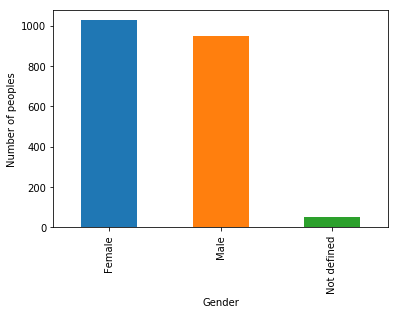

In [48]:
plot=df[df['owns_car']=='Yes'].gender.value_counts()
plt.xlabel('Gender')
plt.ylabel('Number of peoples')
plot
plot.plot(kind='bar')

# This shows that female mostly own the car

# Bike purchases 

In [ ]:
df[['3y_bike_purchases','gender']]
female=df[df['gender']=='Female']['3y_bike_purchases'].sum()
male=df[df['gender']=='Male']['3y_bike_purchases'].sum()
unknown=df[df['gender']=='Not defined']['3y_bike_purchases'].sum()
print('female', female)
print('male', male)
print('unknown', unknown

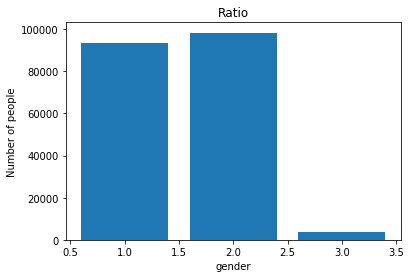

In [71]:
x=[1, 2,3 ]
y=[male, female, unknown]
plt.bar(x,y)
plt.xlabel('gender')
plt.ylabel('Number of people')
plt.title('Ratio')
plt.show()